In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from copy import deepcopy
%matplotlib inline

#**K nearest Neighbor** 

1

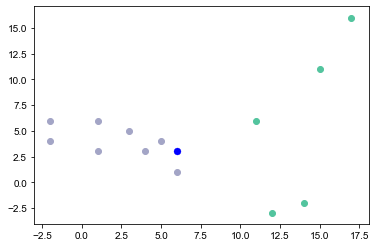

In [2]:
class K_classifier(object):
    
  def __init__(self, X, targets, k = 3, classes = 2):
    
    self.k = k
    self.X = X
    self.targets = targets
    self.classes = classes

  def fit(self):

    #kein Training nötig, da Klassifikation nur bei predict aufgrund des Algorithmus 
    
    return self

  def random_color(self):
        
    tuple1 = []
    
    for i in range(3):
      tuple1.append(random.random())

    tuple1 = tuple(tuple1)
    
    return tuple1

  def distance(self, vektor1, vektor2):
        
    differenzvektor = vektor1 - vektor2
    quad_summe = 0
    
    for element in differenzvektor:
      quad_summe += element**2

    quad_summe = math.sqrt(quad_summe)
    
    return quad_summe

  def finde_kleinster(self, liste):
        
    wert = liste[0][0]
    position = 0
    index = 1
    while index < len(liste):
      if wert > liste[index][0]:
        wert = liste[index][0]
        position = index

      index += 1

    return position


  def sortiere(self,liste):

    liste2 = []
    liste_kopie = deepcopy(liste)
    laenge = len(liste_kopie)

    for i in range(laenge):
      index = self.finde_kleinster(liste_kopie)
      liste2.append([liste_kopie[index][0], liste_kopie[index][1]])
      liste_kopie.pop(index)

    return liste2

  def haeufigste(self, liste):

    #geht nur, wenn k nicht größer als Menge der Inputs ist

    if self.k <= len(liste):
      # nur die k nächsten Nachbarn
    
      liste_kopie = deepcopy(liste)
      liste_kopie = liste_kopie[:self.k]
    
      #Klassen in eine Liste zum Zählen
        
      zaehl_liste = []
      for element in liste:
        zaehl_liste.append(element[1])

      index = 0
      nummernliste = []
        
      #eine Art mapping
    
      for element in zaehl_liste:
        nummer = zaehl_liste.count(element)
        nummernliste.append(nummer)

      #Index mit größter Zahl ermitteln
    
      maximum = nummernliste[0]
      index = 1
      position = 0
        
      while index < len(nummernliste):
        if nummernliste[index] > maximum:
          maximum = nummernliste[index]
          position = index

        index += 1 

      klasse = zaehl_liste[position]
    
      return klasse

    

  def predict(self, input,farbe=None):

    #klassifikation
    #Distanz

    distances = []
    for i in range(len(self.X)):
      d = self.distance(self.X[i], input)
      distances.append([d, self.targets[i]])

    distances = self.sortiere(distances)

    klasse = self.haeufigste(distances)

    if farbe == None:
      #plot
      self.X = np.vstack((self.X,input))
      #print(self.X)
      self.targets = np.append(arr=self.targets, values=klasse)
      #print(self.targets)

    self.plotten(0,1,farbe,input)


    return klasse

  def plotten(self, feature1, feature2,farbe=None,input=None):

    color_dict = {}

    for i in range(self.classes):
      color_dict.update({str(i) : self.random_color()})

    for i in range(len(self.X)):
      plt.scatter(self.X[i][feature1], self.X[i][feature2], facecolor = color_dict[str(self.targets[i])])
    
    plt.style.use('seaborn')

    if farbe != None:
      plt.scatter(input[0],input[1],color=farbe)



hallo = np.array([[1,3],[-2,4],[3,5],[-2,6],[4,3],[6,1],[1,6],[5,4],[12,-3],[11,6],[17,16],[14,-2],[15,11]])
bibo = np.array([1,1,1,1,1,1,1,1,0,0,0,0,0])
k = K_classifier(k=3, X=hallo, targets=bibo, classes = 2)
k.predict(np.array([6,3]), farbe = 'b')